# <center> **Generación de Gaussianas Multivariadas** </center>
## <font size=4> **Inteligencia Artificial 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Generar variables aleatorias gaussianas con $\mu, \Sigma$ prescrita

In [3]:
n = 5000

In [4]:
d = 3
mu0 = np.zeros(d)
sig0 = np.eye(d)

In [5]:
sig0

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [6]:
mu0

array([0., 0., 0.])

In [7]:
# Genera una muestra aleatoria de una normal d-dimensional
# con media mu0 y covarianza sig0
Z = np.random.multivariate_normal(mu0, sig0, size=n)

In [8]:
Z.shape

(5000, 3)

In [9]:
Z[:10]

array([[-0.79964643,  1.17886138,  1.98603723],
       [-0.22168626, -0.9955928 ,  0.36768753],
       [ 0.09865186,  0.37910444,  1.12524833],
       [ 0.75234208,  0.14759529,  0.18410475],
       [-1.37398521, -1.10501335, -0.84163926],
       [-0.49064721, -0.66415542,  0.96250476],
       [-0.90213166,  1.01695611, -0.98033028],
       [ 0.80007205, -0.18460437,  1.28769262],
       [ 1.62168288,  1.01250859,  0.7473288 ],
       [-0.63180011,  0.77287275,  1.00125181]])

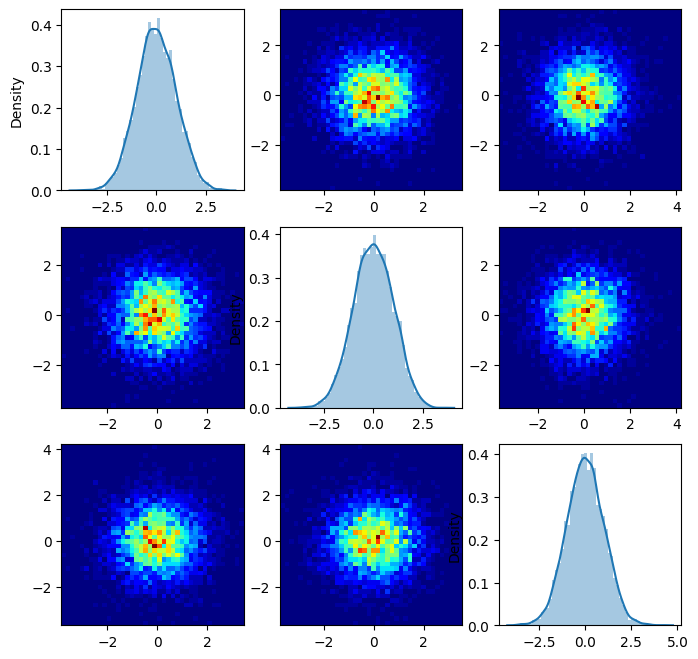

In [10]:
plt.figure(figsize=(8,8))
for i in range(0, d):
    for j in range(0, d):
        plt.subplot(d, d, d*i+j+1)
        if (i==j):
            sns.distplot(Z[:,i], kde=True)
        else:
            plt.hist2d(Z[:,j], Z[:,i], bins=(40,40), cmap=plt.cm.jet)
plt.show()

In [11]:
Z.mean(axis=0)

array([0.00946161, 0.00976119, 0.01060195])

In [12]:
CovZ = np.corrcoef(Z.T)

In [13]:
np.round(CovZ, 3)

array([[ 1.   , -0.011,  0.015],
       [-0.011,  1.   ,  0.004],
       [ 0.015,  0.004,  1.   ]])

## Convertir a mu y Sigma dada por el usuario

In [14]:
mu = np.array([1, 2, -0.5])
mu

array([ 1. ,  2. , -0.5])

In [15]:
Sig = np.array([[1.0,  0.3,  -0.9],
                [0.3,  1.0,  -0.6], 
                [-0.9, -0.6, 1.0]])

In [16]:
Sig

array([[ 1. ,  0.3, -0.9],
       [ 0.3,  1. , -0.6],
       [-0.9, -0.6,  1. ]])

In [17]:
np.linalg.eig(Sig)

EigResult(eigenvalues=array([2.23392718, 0.03942647, 0.72664636]), eigenvectors=array([[-0.5928513 , -0.61083416, -0.52479421],
       [-0.46414185, -0.27336893,  0.84252108],
       [ 0.65810309, -0.74306868,  0.12144657]]))

In [18]:
L = np.linalg.cholesky(Sig).T

In [19]:
L

array([[ 1.        ,  0.3       , -0.9       ],
       [ 0.        ,  0.9539392 , -0.345934  ],
       [ 0.        ,  0.        ,  0.26519742]])

In [20]:
(L.T) @ L

array([[ 1. ,  0.3, -0.9],
       [ 0.3,  1. , -0.6],
       [-0.9, -0.6,  1. ]])

In [21]:
# Generación de N(\mu, \Sigma)

X = mu + (Z @ L)

In [22]:
X.shape

(5000, 3)

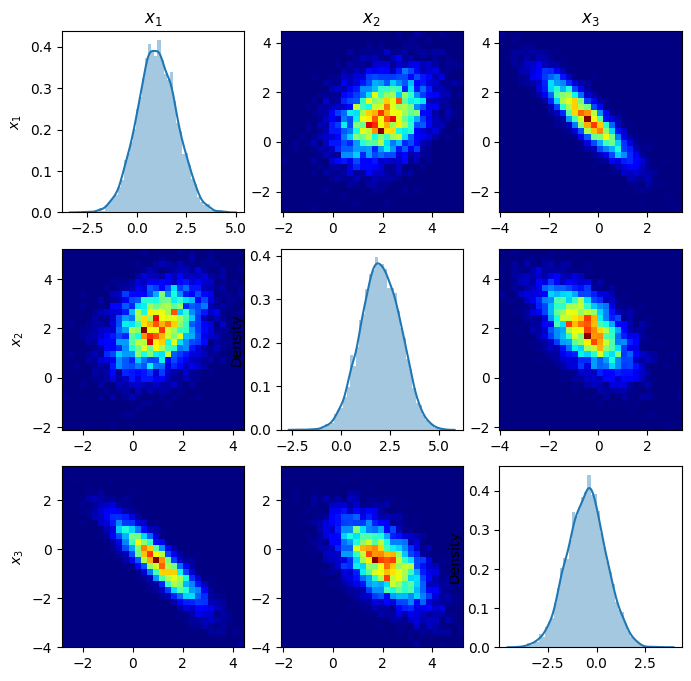

In [23]:
plt.figure(figsize=(8,8))
for i in range(0, d):
    for j in range(0, d):
        plt.subplot(d, d, d*i+j+1)
        if (i==j):
            sns.distplot(X[:,i], kde=True)
        else:
            plt.hist2d(X[:,j], X[:,i], bins=(30,30), cmap=plt.cm.jet)
        if (j==0):
            plt.ylabel(r'$x_{}$'.format(i+1))
        if (i==0):
            plt.title(r'$x_{}$'.format(j+1))
plt.show()

In [24]:
X.mean(axis=0)

array([ 1.00946161,  2.01215007, -0.50908057])

In [25]:
CovX = np.corrcoef(X.T)

In [26]:
np.round(CovX, 4)

array([[ 1.    ,  0.2876, -0.8969],
       [ 0.2876,  1.    , -0.5934],
       [-0.8969, -0.5934,  1.    ]])

In [27]:
Y = np.random.multivariate_normal(mu, Sig, 500)

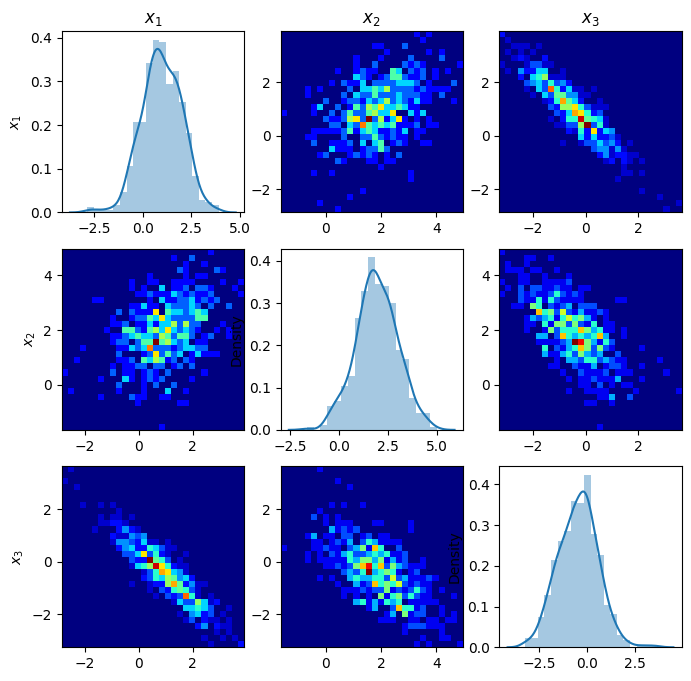

In [28]:
plt.figure(figsize=(8,8))
for i in range(0, d):
    for j in range(0, d):
        plt.subplot(d, d, d*i+j+1)
        if (i==j):
            sns.distplot(Y[:,i], kde=True)
        else:
            plt.hist2d(Y[:,j], Y[:,i], bins=(30,30), cmap=plt.cm.jet)
        if (j==0):
            plt.ylabel(r'$x_{}$'.format(i+1))
        if (i==0):
            plt.title(r'$x_{}$'.format(j+1))
plt.show()